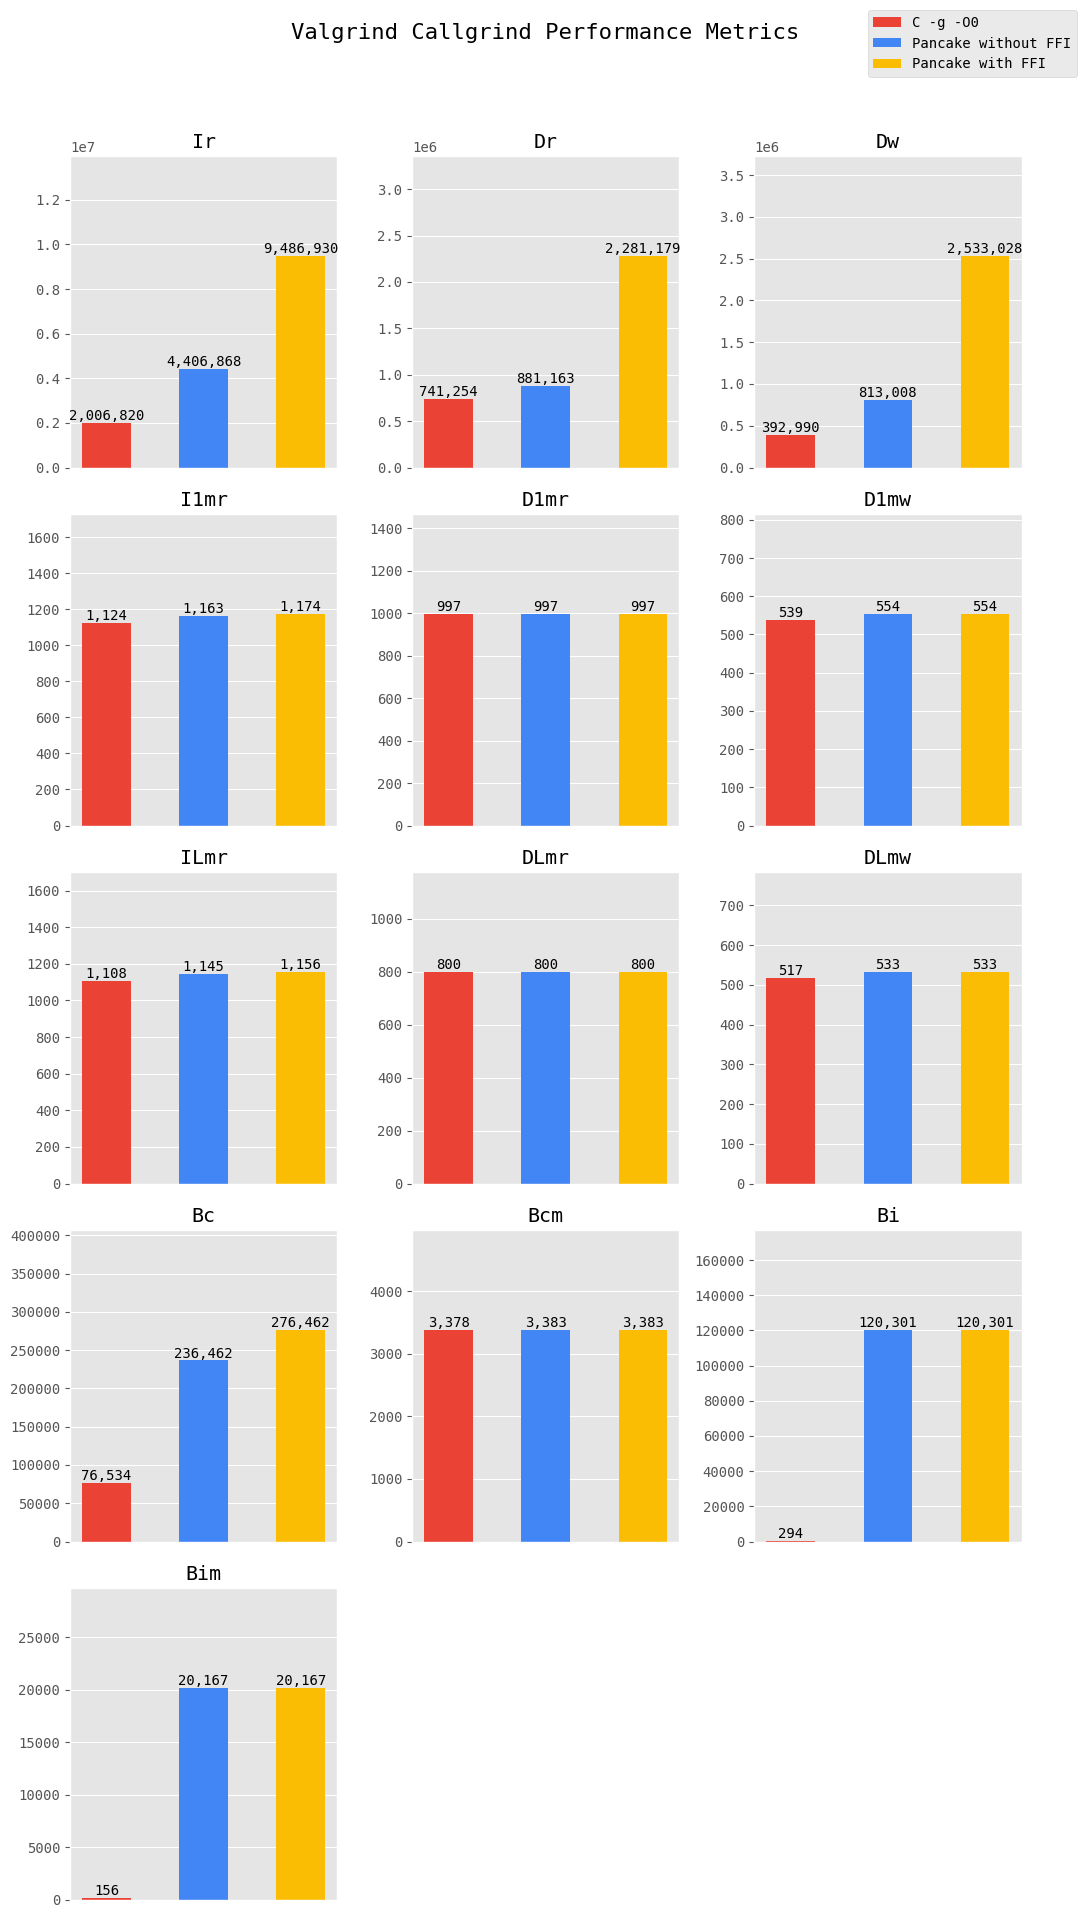

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../data/valgrind_data.csv')

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'monospace'
columns_to_plot = df.columns[1:-1]

n_plots = len(columns_to_plot)
n_cols = 3
n_rows = (n_plots - 1) // n_cols + 1

fig, axs = plt.subplots(n_rows, n_cols, figsize=(11, 4 * n_rows))
fig.suptitle('Valgrind Callgrind Performance Metrics', fontsize=16)

axs = axs.flatten()
n_runs = len(df['Run'])
colors = ["#EA4335", "#4285F4", "#FBBC04"]

for i, column in enumerate(columns_to_plot):
    ax = axs[i]
    bars = ax.bar(df['Run'], df[column], color=colors, width=0.5)
    ax.set_ylim(0, ax.get_ylim()[1] * 1.4)
    ax.set_title(column)
    ax.set_xticks([])

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,.0f}', ha='center', va='bottom')

for i in range(len(columns_to_plot), len(axs)):
    fig.delaxes(axs[i])

legend_elements = [plt.Rectangle((0,0),1,1, facecolor=colors[i], edgecolor='none') for i in range(n_runs)]
fig.legend(legend_elements, ["C -g -O0", "Pancake without FFI", "Pancake with FFI"], loc='upper right', bbox_to_anchor=(0.99, 0.99))

plt.tight_layout(rect=[0, 0.03, 0.95, 0.95])
plt.savefig('valgrind_metrics.svg', format='svg', bbox_inches='tight')
plt.show()

| Abbreviation | Description |
|--------------|-------------|
| Ir | Number of instructions executed |
| Dr | Number of memory reads |
| Dw | Number of memory writes |
| I1mr | I1 cache read misses |
| D1mr | D1 cache read misses |
| D1mw | D1 cache write misses |
| ILmr | LL cache instruction read misses |
| DLmr | LL cache data read misses |
| DLmw | LL cache data write misses |
| Bc | Conditional branches executed |
| Bcm | Conditional branches mispredicted |
| Bi | Indirect branches executed |
| Bim | Indirect branches mispredicted |